#FormulaSAE Track Cones Classification
Dataset provided by UniNa Corse Driverless Team and obtained from several videos of FormulaSAE tracks. 

For each video, it has been sampled with 3 frames for each second, and labeled with bounding boxes surrounding each cone. 

For each cone in a frame, it has been extracted an image that represents the bounding box.

Classes for the cones:
*  Big Orange Cones: delimit the beginning and the end of a track
*  Blue Cones: delimit the left border of the track
*  Little Orange Cones: delimit the Finish Area, where the cars must safely stop
*  Yellow Cones: delimit the right border of the track



##Feature extraction with CNNs
Features were extracted (for each image in the dataset) from specific pre-trained neural networks:  

*   ResNet34
*   MobileNet
*   EfficientNetB0


#Solution

##Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

##Dataset extraction
Each dataset of features has been considered as a unique dataset without differentiating between videos. 

In [ ]:
base_path = '/content/drive/datichallenge3'

In [ ]:
def extract_data(modello):
  dataframe_train = pd.concat(pd.read_csv(os.path.join(base_path,modello,modello,filename), sep = ';') for filename in sorted(os.listdir(os.path.join(base_path,modello,modello))))
  dataframe_test = pd.read_csv(os.path.join(base_path,modello+"_test",modello+"_test","TEST.csv"), sep = ';')
  return dataframe_train, dataframe_test

lista_modelli = ['resnet34', 'mobileNet', 'efficientNet']
lista_df = []
for elem in lista_modelli:
  lista_df.append(extract_data(elem))

In [ ]:
for df_train, df_test in lista_df:
  print(df_train.shape, df_test.shape)

(11170, 516) (6347, 514)
(11170, 1284) (6347, 1282)
(11170, 1284) (6347, 1282)


In [ ]:
for i in range(3):
  print(lista_df[i][0]['images'].head())

0    IMG_44571_frame_0036_0
1    IMG_44571_frame_0036_1
2    IMG_44571_frame_0036_2
3    IMG_44571_frame_0036_3
4    IMG_44571_frame_0056_0
Name: images, dtype: object
0    IMG_44571_frame_0036_0
1    IMG_44571_frame_0036_1
2    IMG_44571_frame_0036_2
3    IMG_44571_frame_0036_3
4    IMG_44571_frame_0056_0
Name: images, dtype: object
0    IMG_44571_frame_0036_0
1    IMG_44571_frame_0036_1
2    IMG_44571_frame_0036_2
3    IMG_44571_frame_0036_3
4    IMG_44571_frame_0056_0
Name: images, dtype: object


In [ ]:
for i in range(3):
  print(lista_df[i][0].columns)

Index(['Unnamed: 0', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'images',
       'cone_name', 'label'],
      dtype='object', length=516)
Index(['Unnamed: 0', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'images',
       'cone_name', 'label'],
      dtype='object', length=1284)
Index(['Unnamed: 0', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'images',
       'cone_name', 'label'],
      dtype='object', length=1284)


Dropping useless columns in each dataset

In [ ]:
for i in range(3):
  lista_df[i][0].drop(columns = ['Unnamed: 0', 'images','cone_name'], inplace = True) #train
  lista_df[i][1].drop(columns = ['Unnamed: 0'], inplace = True) #test


In [ ]:
for i in range(3):
  print(lista_df[i][0].columns)

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511',
       'label'],
      dtype='object', length=513)
Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278',
       'f1279', 'label'],
      dtype='object', length=1281)
Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278',
       'f1279', 'label'],
      dtype='object', length=1281)


##Choosing the dataset for the model
MobileNet and EfficientNetB0 datasets include a number of features very large compared to ResNet data. 

By trial and by comparing performances on different models, it seems that ResNet data is the best for the problem. 



##Using ResNet data

In [ ]:
dataframe_train,dataframe_test = lista_df[0]

In [ ]:
dataframe_train


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,label
0,0.836255,0.907424,1.053860,0.991946,0.933075,1.064755,0.968515,0.941333,1.078518,1.036269,...,0.973374,0.953238,0.985653,0.833059,0.906620,1.015913,0.928407,0.849070,0.841015,2
1,0.949210,0.919543,0.954709,0.872805,0.831474,0.996125,0.983696,0.916689,1.060814,1.069118,...,0.928242,0.989072,1.051096,0.815184,0.844315,1.024687,0.909582,0.885160,0.923456,1
2,0.872059,0.805015,1.128682,1.030319,0.994929,1.053204,1.049777,1.003703,1.123973,0.953613,...,0.953977,0.786672,0.935871,0.831891,0.844540,1.109389,1.007623,0.957461,0.898303,3
3,0.894970,0.958526,1.045619,1.017022,0.842676,1.011835,0.952517,0.997717,1.082864,1.006130,...,0.985248,0.919755,0.970036,0.754004,0.803950,1.016345,0.914277,0.866507,0.922557,4
4,0.925398,0.921613,1.009103,0.866360,0.910151,0.997924,0.983420,0.821642,1.019346,1.033075,...,0.990174,0.941261,0.978289,0.822331,0.843082,0.998245,0.939026,0.873255,0.984736,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.908619,0.983022,0.927863,0.910634,0.956793,0.934456,0.915548,0.904347,0.987166,0.917293,...,0.946984,0.816786,1.141704,0.871824,1.028780,0.987606,0.970341,0.881821,0.889185,2
533,0.782895,0.920148,1.100891,0.973500,0.998406,0.908219,1.101599,0.971445,1.090190,0.997196,...,0.972855,0.829189,1.091649,0.821241,0.870494,0.978117,1.008594,0.937237,0.976681,2
534,0.995225,0.915049,1.002543,1.014312,0.964770,1.078621,1.165058,0.897381,1.018588,0.991128,...,0.969936,0.888881,1.091179,0.811935,0.935743,0.998495,1.016839,0.958040,0.984406,2
535,0.953805,0.780477,0.999406,0.908189,1.015796,1.088708,1.072853,0.814974,1.080323,0.939411,...,0.975260,0.883875,0.997910,0.779030,0.987959,1.063788,0.932422,0.883684,0.933529,2


In [ ]:
dataframe_test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f503,f504,f505,f506,f507,f508,f509,f510,f511,image
0,0.911863,0.952458,1.085506,0.910698,0.880114,1.016642,0.934292,1.024749,1.228008,0.951209,...,0.874452,0.974516,1.105526,0.824213,0.847534,1.071275,0.944886,0.901812,0.883428,img_1
1,0.843607,0.855531,1.043309,0.820285,0.940399,0.884501,0.982856,0.809213,1.116383,1.116935,...,0.928182,0.858758,1.086330,0.816912,0.809086,1.059228,1.033703,1.001865,0.824272,img_2
2,0.916222,0.942230,1.002605,1.082436,0.911001,1.070029,1.015654,0.989635,1.155890,0.921690,...,0.979656,0.841254,0.985832,0.742647,0.816151,0.949110,0.962458,0.944196,0.901135,img_3
3,0.939866,0.894583,0.977679,0.993503,0.825840,1.105817,1.085492,0.932002,1.098837,0.901233,...,0.806793,0.826533,0.990626,0.836815,0.871509,1.040827,0.939574,0.895419,0.933376,img_4
4,0.839180,0.846156,0.974693,0.923588,0.873181,1.016332,0.932543,0.890156,1.018494,1.007655,...,0.892549,0.777361,1.024498,0.763530,0.887580,1.080938,0.968538,0.823913,0.971222,img_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,0.903637,0.894918,0.972850,0.892294,0.883804,0.856019,0.906783,0.957618,1.035107,0.994898,...,0.882996,0.833758,1.021952,0.796013,0.867376,1.031249,0.950731,0.866825,0.935192,img_6343
6343,0.888307,0.838468,0.943212,0.946082,0.846475,0.956558,0.853159,0.909302,1.074254,1.036971,...,0.875842,0.945815,0.945774,0.759199,0.871486,1.014325,0.946054,0.879463,0.929823,img_6344
6344,0.938489,0.887796,0.965867,0.849430,0.884429,0.992548,0.863497,0.954951,1.107302,0.983217,...,0.870842,0.971231,1.044564,0.782467,0.823833,1.040046,0.970370,0.865705,0.959305,img_6345
6345,0.907919,0.927351,1.014928,0.996848,0.882895,1.026478,0.994744,0.977180,1.096482,0.993023,...,0.881324,0.946865,1.035421,0.810376,0.867358,1.046545,1.001025,0.788454,0.952388,img_6346


##Dataset splitting and preprocessing
2 different splits: one for test (20%), one for validation (8%).

Using the stratify parameter, each one has nearly the same distribution of classes, and samples are randomly extracted with a seed (repeatability).

In [ ]:
##localtest
x_train, x_test, y_train, y_test = train_test_split(dataframe_train[dataframe_train.columns[:-1]],
                                                    dataframe_train[[dataframe_train.columns[-1]]],
                                                    test_size = .2,
                                                    stratify = dataframe_train[[dataframe_train.columns[-1]]],
                                                    random_state = 1)

x_train2, x_val, y_train2, y_val = train_test_split(x_train,
                                                    y_train,
                                                    test_size = .1,
                                                    stratify = y_train,
                                                    random_state = 3)


y_train2  = np.ravel(y_train2)
y_test  = np.ravel(y_test)
y_val  = np.ravel(y_val)

In [ ]:
print(x_train2.shape)
print(x_val.shape)
print(x_test.shape)


(8042, 512)
(894, 512)
(2234, 512)


Converting classes into one-hot encoding

In [ ]:
y_train2 = tf.one_hot(y_train2, depth = 5)
y_test = tf.one_hot(y_test, depth = 5)
y_val = tf.one_hot(y_val, depth = 5)

y_train2 = np.delete(y_train2, 0, axis = 1) 
y_test = np.delete(y_test, 0, axis = 1) 
y_val = np.delete(y_val, 0, axis = 1) 

Distribution of classes in different partitions

In [ ]:
print(np.sum(y_train2, axis =0))
print(np.sum(y_test, axis =0))
print(np.sum(y_val, axis =0))

[1082. 2848. 1071. 3041.]
[301. 791. 297. 845.]
[120. 317. 119. 338.]


##Base model


*   Normalization
*   Dense layers with dropout in the first layers.
*   Batch Normalization, for stability.
*   Output layer with softmax.



In [ ]:
N = x_train2.shape[1]
normalize = layers.Normalization(axis =-1)
normalize.adapt(x_train2)

def model_base():
  model = tf.keras.Sequential([
    normalize,
    layers.Dense(np.floor(N),  
                activation ="relu"),
    layers.Dropout(0.5),
    layers.Dense(np.floor(N),  
                activation ="relu"),
    layers.Dropout(0.2),
    layers.Dense(np.floor(N/2),  
                activation ="relu"),
    layers.Dense(np.floor(N/4),  
                activation ="relu"),
    layers.Dense(np.floor(N/8),  
                activation ="relu"),
    layers.Dense(np.floor(N/16),  
                activation ="relu"),
    layers.BatchNormalization(),
    layers.Dense(4, activation = 'softmax')
  ])

  model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4,
                                                     beta_1 = 0.9,
                                                     beta_2=0.9),
              metrics =['accuracy'])
  return model

base = model_base()
base.build(input_shape = x_train2.shape)
base.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 512)              1025      
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                        

##Choosing the structure with keras tuner

In a first attempt, starting from the base model, I tried to choose the structure and hyperparameters of the model using keras tuner, minimizing the validation loss.

Parameters to tune:

*   N controls neurons in each layer.
*   Dropout Ratio.
*   Learning rate.
*   Beta_1.
*   Beta_2.


In [ ]:
!pip install keras-tuner -U -qq
import keras_tuner as kt

In [ ]:
N = x_train2.shape[1]
normalize = layers.Normalization(axis =-1)
normalize.adapt(x_train2)

def model_building2(hp):
  hp_dense = hp.Int('units', min_value=350, max_value=N, step=12)
  hp_drop1 = hp.Choice('drp1', [0.8])
  hp_drop2 = hp.Choice('drp2', [0.5,0.2,0.1,0.0])
  model = tf.keras.Sequential([
    normalize,
    layers.Dense(np.floor(hp_dense),  
                activation ="relu"),
    layers.Dropout(hp_drop1),
    layers.Dense(np.floor(hp_dense),  
                activation ="relu"),
    layers.Dropout(hp_drop1),
    layers.Dense(np.floor(hp_dense/2),  
                activation ="relu"),
    layers.Dropout(hp_drop2),
    layers.Dense(np.floor(hp_dense/4),  
                activation ="relu"),
    layers.Dense(np.floor(hp_dense/8),  
                activation ="relu"),
    layers.Dense(np.floor(hp_dense/16),  
                activation ="relu"),
    layers.BatchNormalization(),
    layers.Dense(4, activation = 'softmax')
  ])


  hp_learning_rate = hp.Choice('learning_rate', [1e-4,1e-5,1e-6])
  hp_beta_1 = hp.Choice('beta_1', [0.9,.99,.6,.7])
  hp_beta_2 = hp.Choice('beta_2', [0.9,0.8,0.7,0.6])
  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate,
                                                     beta_1 = hp_beta_1, #exponential decay rate for the 1nd moment estimates
                                                     beta_2=hp_beta_2), #exponential decay rate for the 2nd moment estimates
                metrics =['accuracy'])
  
  return model

In [ ]:
tuner2 = kt.Hyperband(model_building2,
                     objective='val_loss',
                     max_epochs=10,
                     factor=2,
                     directory='my_dir',
                     project_name='tuning_model',
                      overwrite = True)

In [ ]:
tuner2.search(x_train2,
              y_train2, 
              epochs = 50, 
              validation_data = (x_val,y_val), 
              shuffle = True, 
              batch_size = 10, 
              validation_batch_size=1)

Trial 46 Complete [00h 01m 38s]
val_loss: 0.7260934710502625

Best val_loss So Far: 0.4100143015384674
Total elapsed time: 00h 38m 35s


In [ ]:
best_hps=tuner2.get_best_hyperparameters()[0]

In [ ]:
print(best_hps['units'],
      best_hps['drp1'],
      best_hps['drp2'],
      best_hps['learning_rate'],
      best_hps['beta_1'],
      best_hps['beta_2'])

422 0.8 0.2 0.0001 0.9 0.6


##Best version
By trial on the validation set, i have found a modified model from the previous one, which performs better:

*   Higher N.
*   Gaussian noise.
*   Gaussian dropout.
*   Learning rate decay.



In [ ]:
def create_model(x_training):
  N = x_training.shape[1]+200
  normalize = layers.Normalization(axis =-1)
  normalize.adapt(x_training)
  model = tf.keras.Sequential([
    normalize,
    layers.GaussianNoise(0.7), # (additive) to mitigate overfitting
    layers.Dense(np.floor(N),  
                activation ="relu"),
    layers.GaussianDropout(0.5), #multiplicative 1-centered Gaussian noise
    layers.Dense(np.floor(N/2),  
                activation ="relu"),
    layers.GaussianDropout(0.2),
    layers.Dense(np.floor(N/4),  
                activation ="relu"),
    layers.Dense(np.floor(N/8),  
                activation ="relu"),
    layers.Dense(np.floor(N/16),  
                activation ="relu"),
    layers.Dense(np.floor(N/32),  
                activation ="relu"),
    layers.BatchNormalization(),
    layers.Dense(4, activation = 'softmax')
  ])

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    5*1e-4,   
    decay_steps=100000,
    decay_rate=0.96,  #initial_learning_rate * decay_rate ^ (step / decay_steps)
    staircase=True) #decay the learning rate at discrete intervals int(step / decay_steps)
  model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule,
                                                     beta_1 = 0.9, #exponential decay rate for the 1st moment estimates
                                                     beta_2=0.9), #exponential decay rate for the 2nd moment estimates
              metrics =['accuracy'])
  return model

##Final model structure

In [ ]:
model = create_model(x_train2)
model.build(input_shape = x_train2.shape)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 512)              1025      
 ion)                                                            
                                                                 
 gaussian_noise_9 (GaussianN  (None, 512)              0         
 oise)                                                           
                                                                 
 dense_63 (Dense)            (None, 712)               365256    
                                                                 
 gaussian_dropout_18 (Gaussi  (None, 712)              0         
 anDropout)                                                      
                                                                 
 dense_64 (Dense)            (None, 356)               253828    
                                                      

##Training the model
Last step: choosing batch size and number of epochs.

*   After 20 epochs, the validation loss function will diverge from the training one(overfitting).
*   Batch size: 20.



In [ ]:
history = model.fit(x_train2,
                    y_train2, 
                    epochs = 20, 
                    validation_data = (x_val,y_val), 
                    batch_size = 20, 
                    validation_batch_size=1)

Epoch 1/20
403/403 [==============================] - 7s 15ms/step - loss: 0.7880 - accuracy: 0.6839 - val_loss: 0.2639 - val_accuracy: 0.9217
Epoch 2/20
403/403 [==============================] - 7s 16ms/step - loss: 0.3834 - accuracy: 0.8667 - val_loss: 0.2172 - val_accuracy: 0.9306
Epoch 3/20
403/403 [==============================] - 6s 16ms/step - loss: 0.3200 - accuracy: 0.8901 - val_loss: 0.1994 - val_accuracy: 0.9306
Epoch 4/20
403/403 [==============================] - 6s 15ms/step - loss: 0.2677 - accuracy: 0.9079 - val_loss: 0.1909 - val_accuracy: 0.9374
Epoch 5/20
403/403 [==============================] - 5s 13ms/step - loss: 0.2424 - accuracy: 0.9192 - val_loss: 0.1846 - val_accuracy: 0.9407
Epoch 6/20
403/403 [==============================] - 7s 17ms/step - loss: 0.2319 - accuracy: 0.9218 - val_loss: 0.1865 - val_accuracy: 0.9407
Epoch 7/20
403/403 [==============================] - 6s 15ms/step - loss: 0.2191 - accuracy: 0.9289 - val_loss: 0.1765 - val_accuracy: 0.9385

##Loss function plot

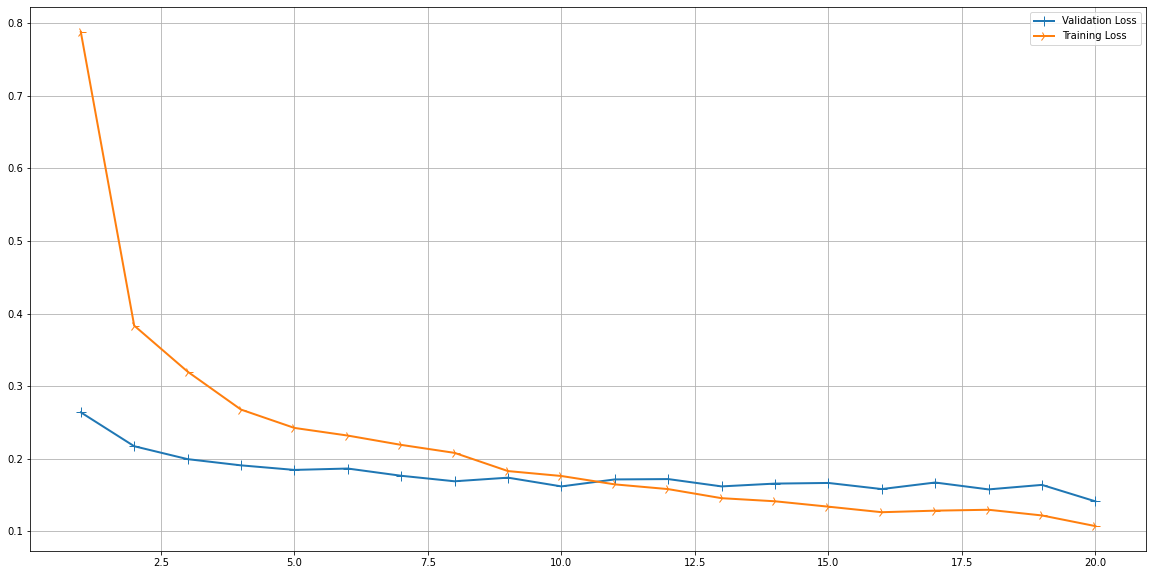

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.figure(figsize = (20,10))
line1 = plt.plot(epochs, val_loss_values, label ='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth = 2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.grid(True)
plt.legend()
plt.show()

##Accuracy plot

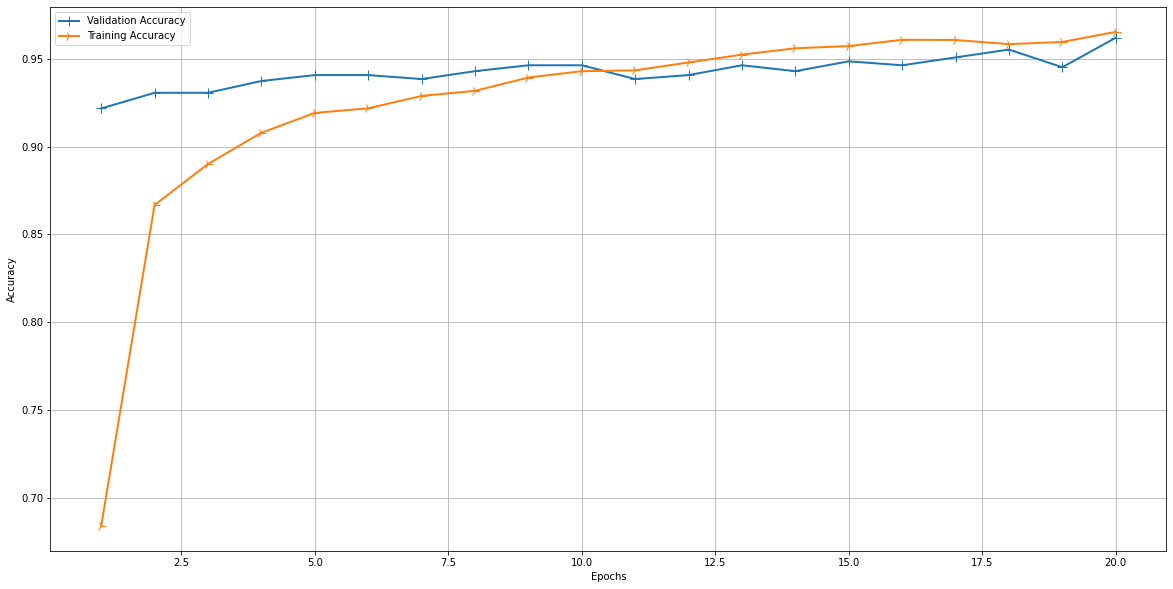

In [ ]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize = (20,10))
line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line2 = plt.plot(epochs, acc_values, label ='Training Accuracy')

plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

##Local test

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

70/70 [==============================] - 1s 6ms/step - loss: 0.1813 - accuracy: 0.9476
Test loss: 0.18132591247558594
Test accuracy: 0.9476275444030762


In [ ]:
predictions = np.argmax(model.predict(x_test),axis = 1)
a = tf.math.confusion_matrix(np.argmax(y_test,axis = 1),predictions) 

70/70 [==============================] - 0s 5ms/step


From the confusion matrix, there is an higher error for the misclassification of class 2 in class 0 (short orange cone, long orange cone).


*   y: Actual values.
*   x: Predicted values.



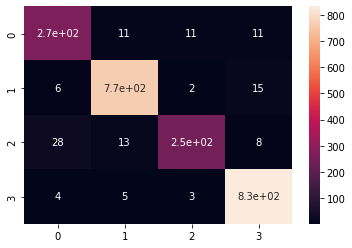

In [ ]:
import seaborn as sn
sn.heatmap(a, annot = True, annot_kws={"size": 10})

##Final test
Since the initial dataset was splitted, there could be a difference between the model trained only on the training portion and the model trained on the full dataset. 

I tried to eliminate the validation set and to reduce the test set.

Then, I retrained the model with best hyperparameters found before on this new dataset to assure that the model was stable.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(dataframe_train[dataframe_train.columns[:-1]],
                                                    dataframe_train[[dataframe_train.columns[-1]]],
                                                    test_size = .15,
                                                    stratify = dataframe_train[[dataframe_train.columns[-1]]],
                                                    random_state = 2)


y_train  = np.ravel(y_train)
y_test  = np.ravel(y_test)
y_train = tf.one_hot(y_train, depth = 5)
y_test = tf.one_hot(y_test, depth = 5)

y_train = np.delete(y_train, 0, axis = 1) 
y_test = np.delete(y_test, 0, axis = 1) 

In [ ]:
model2 = create_model(x_train)
model2.build(input_shape = x_train.shape)

In [ ]:
model2.fit(x_train,
            y_train, 
            epochs = 20, 
            shuffle = True, 
            batch_size = 20)

Epoch 1/20
475/475 [==============================] - 6s 10ms/step - loss: 0.7318 - accuracy: 0.7112
Epoch 2/20
475/475 [==============================] - 5s 10ms/step - loss: 0.3605 - accuracy: 0.8781
Epoch 3/20
475/475 [==============================] - 5s 10ms/step - loss: 0.3162 - accuracy: 0.8937
Epoch 4/20
475/475 [==============================] - 5s 11ms/step - loss: 0.2829 - accuracy: 0.9058
Epoch 5/20
475/475 [==============================] - 5s 10ms/step - loss: 0.2530 - accuracy: 0.9164
Epoch 6/20
475/475 [==============================] - 5s 10ms/step - loss: 0.2315 - accuracy: 0.9228
Epoch 7/20
475/475 [==============================] - 5s 10ms/step - loss: 0.2168 - accuracy: 0.9291
Epoch 8/20
475/475 [==============================] - 5s 10ms/step - loss: 0.1923 - accuracy: 0.9346
Epoch 9/20
475/475 [==============================] - 5s 10ms/step - loss: 0.1985 - accuracy: 0.9344
Epoch 10/20
475/475 [==============================] - 5s 10ms/step - loss: 0.1733 - accura

###Evaluation of the final test

In [ ]:
score = model2.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

53/53 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9487
Test loss: 0.18868453800678253
Test accuracy: 0.9486873745918274


In [ ]:
predictions = np.argmax(model2.predict(x_test),axis = 1)
a = tf.math.confusion_matrix(np.argmax(y_test,axis = 1),predictions) 

53/53 [==============================] - 0s 5ms/step


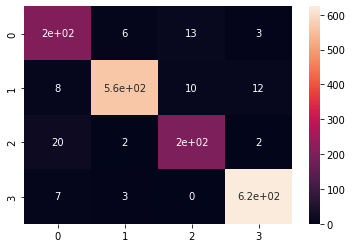

In [ ]:
import seaborn as sn
sn.heatmap(a, annot = True, annot_kws={"size": 10})

##Submission


In [ ]:
x_trains,y_trains = dataframe_train[dataframe_train.columns[:-1]], dataframe_train[[dataframe_train.columns[-1]]]

y_trains  = np.ravel(y_trains)
y_trains = tf.one_hot(y_trains, depth = 5)

y_trains = np.delete(y_trains, 0, axis = 1) 

In [ ]:
modelsub = create_model(x_trains)
modelsub.build(input_shape = x_trains.shape)

In [ ]:
modelsub.fit(x_trains,
              y_trains, 
              epochs = 20,
              shuffle = True, 
              batch_size = 20)

Epoch 1/20
559/559 [==============================] - 7s 10ms/step - loss: 0.6505 - accuracy: 0.7524
Epoch 2/20
559/559 [==============================] - 6s 10ms/step - loss: 0.3462 - accuracy: 0.8823
Epoch 3/20
559/559 [==============================] - 6s 10ms/step - loss: 0.3075 - accuracy: 0.8948
Epoch 4/20
559/559 [==============================] - 8s 14ms/step - loss: 0.2702 - accuracy: 0.9096
Epoch 5/20
559/559 [==============================] - 8s 14ms/step - loss: 0.2489 - accuracy: 0.9195
Epoch 6/20
559/559 [==============================] - 5s 10ms/step - loss: 0.2202 - accuracy: 0.9279
Epoch 7/20
559/559 [==============================] - 5s 10ms/step - loss: 0.2148 - accuracy: 0.9302
Epoch 8/20
559/559 [==============================] - 5s 10ms/step - loss: 0.2071 - accuracy: 0.9350
Epoch 9/20
559/559 [==============================] - 5s 10ms/step - loss: 0.1951 - accuracy: 0.9381
Epoch 10/20
559/559 [==============================] - 6s 10ms/step - loss: 0.1772 - accura

In [ ]:
x_sub = dataframe_test[dataframe_test.columns[:-1]]

In [ ]:
predictions = np.argmax(modelsub.predict(x_sub),axis = 1) + 1
predictions

199/199 [==============================] - 1s 4ms/step


array([4, 4, 2, ..., 1, 2, 1])

In [ ]:
res = list(zip(dataframe_test[dataframe_test.columns[-1]], predictions))
dataframe_sub = pd.DataFrame(res, columns = ['ID', 'Class'])

In [ ]:
dataframe_sub

,ID,Class
0,img_1,4
1,img_2,4
2,img_3,2
3,img_4,1
4,img_5,1
...,...,...
6342,img_6343,3
6343,img_6344,1
6344,img_6345,1
6345,img_6346,2


In [ ]:
dataframe_sub.to_csv('Submission11_challenge3.csv', index = False)